In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [27]:
print(df_heat_2009.dtypes)
print(df_death_2009.dtypes)
print(df_albedo_2009.dtypes)

Notes                                                object
County                                               object
county_code                                          object
Heat Wave Days Based on Daily Maximum Temperature    object
dtype: object
Notes           object
County          object
county_code     object
Year           float64
Year Code      float64
Deaths         float64
Population     float64
Crude Rate      object
dtype: object
NAME            object
county_code     object
Albedo         float64
YEAR             int64
dtype: object


In [35]:
# df_albedo_2009['county_code'] = df_albedo_2009['county_code'].astype('object')
df_heat_2009['county_code'] = df_heat_2009['county_code'].astype('float64')
df_death_2009['county_code'] = df_death_2009['county_code'].astype('float64')
print(df_heat_2009['county_code'].dtypes)
print(df_death_2009['county_code'].dtypes)

float64
float64


In [109]:
# 准备2009年的数据_heat+death+albedo
# 读取数据
df_heat_2009 = pd.read_csv('./Number of Heat Wave Days in May-September (2009).txt', sep='\t', quotechar='"', dtype={'County Code': str}, on_bad_lines='skip')
df_death_2009 = pd.read_csv('./Underlying Cause of Death, 2009.txt', sep='\t', quotechar='"', dtype={'County Code': str}, on_bad_lines='skip')
df_albedo_2009 = pd.read_csv('./county_albedo_2009.csv')

# 重命名保证合并
df_heat_2009.rename(columns={'County Code': 'county_code'}, inplace=True)
df_death_2009.rename(columns={'County Code': 'county_code'}, inplace=True)
df_albedo_2009.rename(columns={'GEOID': 'county_code'}, inplace=True)
# 统一数据格式保证合并
# df_albedo_2009['county_code'] = df_albedo_2009['county_code'].astype('object')
df_heat_2009['county_code'] = df_heat_2009['county_code'].astype('float64')
df_death_2009['county_code'] = df_death_2009['county_code'].astype('float64')

df = df_heat_2009.merge(df_death_2009, on=['county_code'], how='outer').merge(df_albedo_2009, on=['county_code'], how='outer')
df.head()

,Notes_x,County_x,county_code,Heat Wave Days Based on Daily Maximum Temperature,Notes_y,County_y,Year,Year Code,Deaths,Population,Crude Rate,NAME,Albedo,YEAR
0,NaN,"Autauga County, AL",1001.0,36,NaN,"Autauga County, AL",2009.0,2009.0,44.0,54135.0,81.3,Autauga,0.123733,2009.0
1,NaN,"Baldwin County, AL",1003.0,30,NaN,"Baldwin County, AL",2009.0,2009.0,160.0,179406.0,89.2,Baldwin,5000.063672,2009.0
2,NaN,"Barbour County, AL",1005.0,31,NaN,"Barbour County, AL",2009.0,2009.0,14.0,27657.0,Unreliable,Barbour,0.120955,2009.0
3,NaN,"Bibb County, AL",1007.0,55,NaN,"Bibb County, AL",2009.0,2009.0,23.0,22941.0,100.3,Bibb,0.116067,2009.0
4,NaN,"Blount County, AL",1009.0,39,NaN,"Blount County, AL",2009.0,2009.0,69.0,57341.0,120.3,Blount,0.133824,2009.0


In [111]:
# 统一列名
df = df.rename(columns={'Heat Wave Days Based on Daily Maximum Temperature': 'heat_wave_days'})
df = df.rename(columns={'Crude Rate': 'crude_rate'})

# 筛选指定列
df = df[['County_x', 'county_code', 'heat_wave_days', 'Deaths', 'Population', 'crude_rate', 'Albedo']]
print(df.shape)
df.head()

(5237, 7)


,County_x,county_code,heat_wave_days,Deaths,Population,crude_rate,Albedo
0,"Autauga County, AL",1001.0,36,44.0,54135.0,81.3,0.123733
1,"Baldwin County, AL",1003.0,30,160.0,179406.0,89.2,5000.063672
2,"Barbour County, AL",1005.0,31,14.0,27657.0,Unreliable,0.120955
3,"Bibb County, AL",1007.0,55,23.0,22941.0,100.3,0.116067
4,"Blount County, AL",1009.0,39,69.0,57341.0,120.3,0.133824


In [113]:
# 清洗数据
df = df[df['Albedo'] <= 1] # Albedo < 1
df['Rate'] = df.apply(
    lambda row: 0 if row['Deaths'] == 0 else (row['Deaths'] / row['Population']) * 100000, axis=1
) # 标准化rate
 # 

df.shape

(2740, 8)

In [115]:
print(df.dtypes)
print(df.columns)

County_x           object
county_code       float64
heat_wave_days     object
Deaths            float64
Population        float64
crude_rate         object
Albedo            float64
Rate              float64
dtype: object
Index(['County_x', 'county_code', 'heat_wave_days', 'Deaths', 'Population',
       'crude_rate', 'Albedo', 'Rate'],
      dtype='object')


C:\Users\Archy\AppData\Local\Temp\ipykernel_35968\1481922619.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(


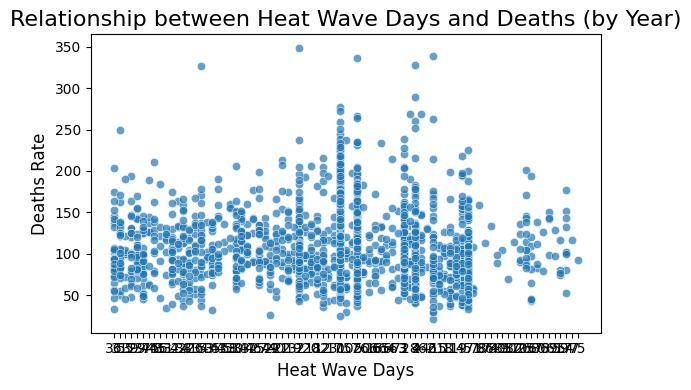

In [117]:
# 可视化数据_death * heat

plt.figure(figsize=(6, 4))
scatter = sns.scatterplot(
    data=df, 
    x='heat_wave_days', 
    # y='Deaths', 
    y='Rate', 
    palette='viridis', 
    sizes=(20, 200),  # 调整点的大小范围
    alpha=0.7  # 设置透明度
)

# 添加标题和轴标签
plt.title("Relationship between Heat Wave Days and Deaths (by Year)", fontsize=16)
plt.xlabel("Heat Wave Days", fontsize=12)
plt.ylabel("Deaths Rate", fontsize=12)
plt.tight_layout()

# 显示图表
plt.show()

In [58]:
# merged_df['heat_wave_days'] = pd.to_numeric(merged_df['heat_wave_days'], errors='coerce')  # Non-numeric values become NaN

In [103]:
df = np.asarray(df)

In [105]:
# 简单线性回归_Z, T and Y

X = df[['heat_wave_days', 'Albedo']]  # 自变量
X = sm.add_constant(X)  # 增加常数项
y = df['Rate']  # 因变量

# 进行OLS回归
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [119]:
df.to_csv('combined_heatdeath_albedo_2009.csv', index=False)